Correlation for AAPL_historical_data.csv: 0.06112636173777413


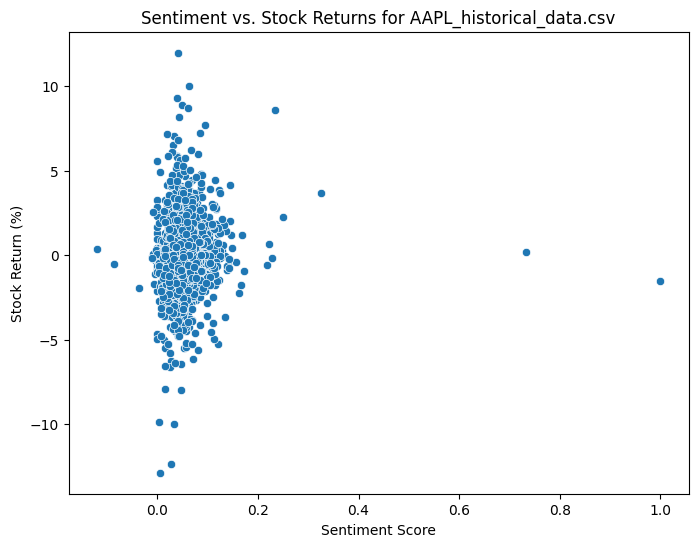

Correlation for AMZN_historical_data.csv: 0.019654341577962094


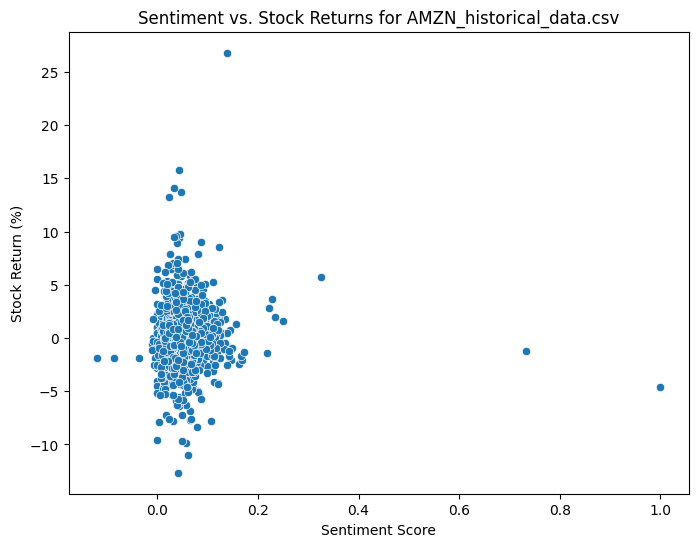

Correlation for GOOG_historical_data.csv: 0.02899999696964221


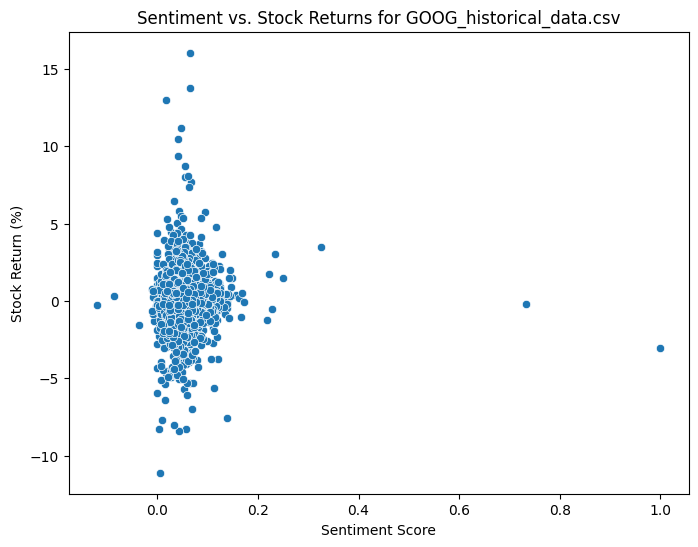

Correlation for META_historical_data.csv: 0.08769568656713009


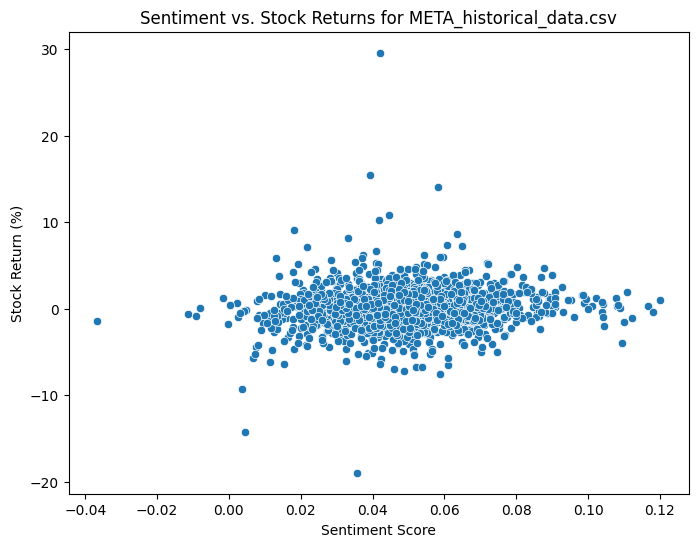

Correlation for MSFT_historical_data.csv: 0.037358854156749735


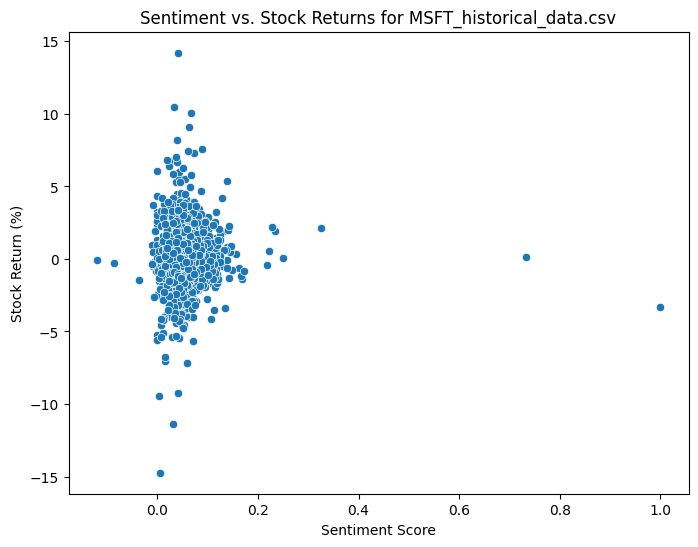

Correlation for NVDA_historical_data.csv: -0.010230307650473542


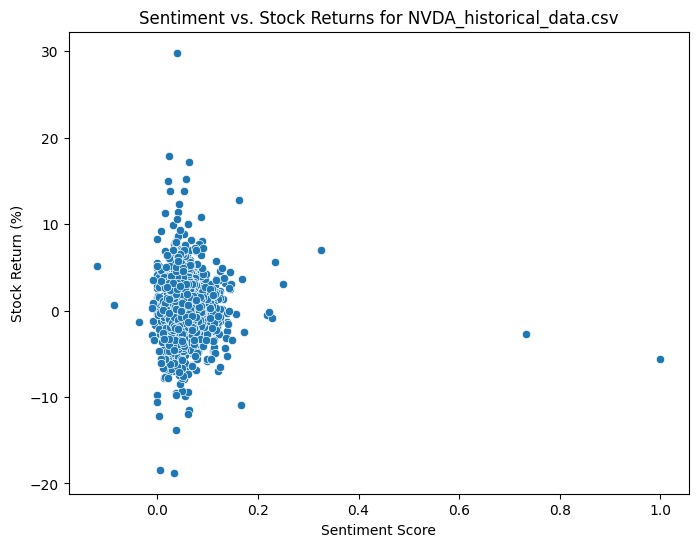

Correlation for TSLA_historical_data.csv: 0.04978689006470701


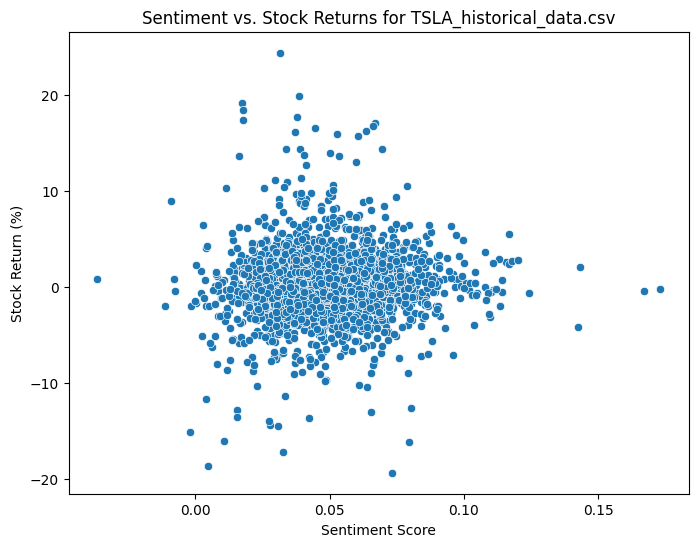

In [6]:
import os
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
from stock_sentiment_analysis import process_stock_sentiment_correlation

# Sentiment analysis function
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Load and process news data
news_file_path = "../data/raw_analyst_ratings.csv"
news_data = pd.read_csv(news_file_path)
news_data.columns = news_data.columns.str.strip().str.lower()  # Standardize column names

if 'date' in news_data.columns and 'headline' in news_data.columns:
    # Standardize dates and remove invalid entries
    news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce', utc=True).dt.date
    news_data = news_data.dropna(subset=['date'])
    # Perform sentiment analysis
    news_data['sentiment_score'] = news_data['headline'].apply(get_sentiment)
    # Aggregate sentiment scores by date (average sentiment per day)
    news_data = news_data.groupby('date', as_index=False)['sentiment_score'].mean()
else:
    raise KeyError("Required columns ('date' and 'headline') are missing in news data.")

# Process stock data
stock_data_folder = "../data/yfinance_data/"
process_stock_sentiment_correlation(stock_data_folder, news_data)